<a href="https://colab.research.google.com/github/Lisa-creates/Process_modeling/blob/main/9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(хорошо) Реализовать инерполяцию траектории с несколькими точками (параграф 9.3)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Вычисление коэффицентов a_j0, a_j1,a_j2, a_j3
def coeff(betta_j, dbetta_j, next_betta_j, dnext_betta_j, deltaT_j):
  a_j0 = betta_j
  a_j1 = dbetta_j
  a_j2 = (3 * (next_betta_j -  betta_j) - 2 * dbetta_j * deltaT_j - dnext_betta_j * deltaT_j) / (deltaT_j ** 2 )
  a_j3 = (2 * betta_j + (dbetta_j + dnext_betta_j) * deltaT_j - 2 * next_betta_j) / (deltaT_j ** 3)

  return [list(a_j0), list(a_j1), list(a_j2), list(a_j3)] # [a_j0, a_j1, a_j2, a_j3]


def interpolate(coefficents, time):
  t_step = 0.01
  coefficents = np.array(coefficents)
  joint_variables = []
  time_val = []
  joint_vel = []

  for j in range(0, len(coefficents), 4):
    curr_time = time[j // 4]
    end_time = time[j // 4 + 1]
    while curr_time < end_time:
      delta_t = curr_time - time[j // 4]
      # траектория на участке выражается полиномом 3 порядка
      betta = coefficents[j] + coefficents[j+1] * delta_t + coefficents[j+2] * delta_t**2 + coefficents[j+3]* delta_t**3
      dbetta = coefficents[j+1] + 2*coefficents[j+2] * delta_t + 3*coefficents[j+3]* delta_t**2

      joint_variables.append(list(betta))
      joint_vel.append(list(dbetta))
      time_val.append(curr_time)
      curr_time += t_step

  return joint_variables, joint_vel, time_val


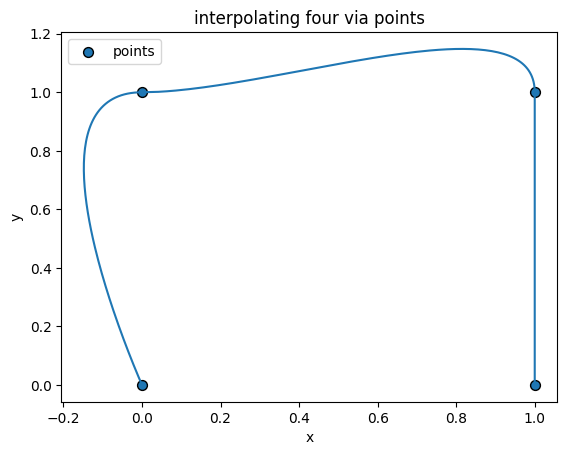

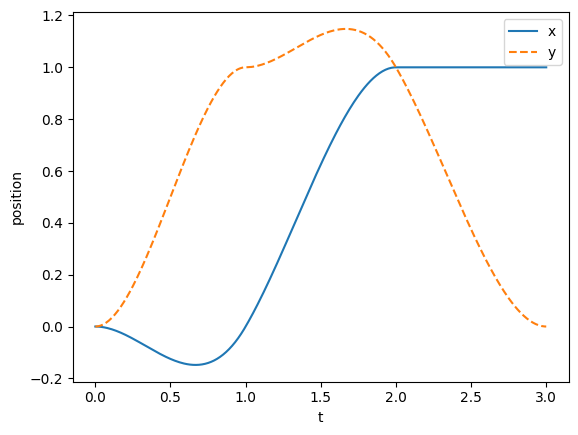

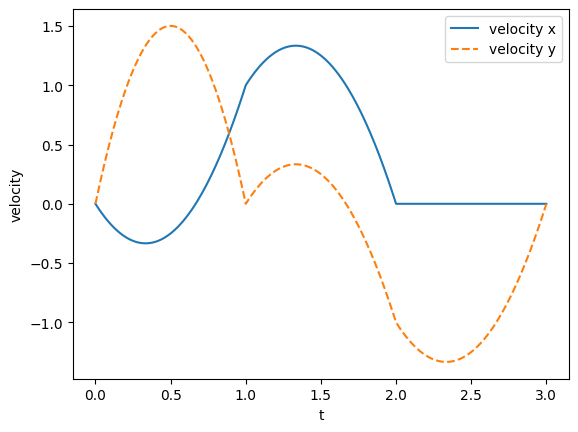

In [ ]:
points = np.array([[0,0], [0,1], [1,1], [1, 0]]) # точки, через которые должна пройти траектория
velocities = np.array([[0,0], [1, 0], [0, -1], [0, 0]])
time = np.array([0, 1, 2, 3])
coefficents = []

for j in range(len(time) - 1):
  coefficents += coeff(points[j], velocities[j], points[j + 1], velocities[j + 1], time[j + 1] - time[j])

joint_variables, joint_vel, time_val = interpolate(coefficents, time)


# Графики

# 1

t = list(map(list,zip(*joint_variables))) # запись координат x и y в отдельные листы
p = list(map(list,zip(*points)))

fig, ax = plt.subplots()
ax.plot(t[0], t[1])
ax.scatter(p[0],p[1], s=50, label = 'points', facecolor='C0', edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('I-nterpolating four via points')
ax.legend()

# 2

fig, ax = plt.subplots()
ax.plot(time_val, t[0], label='x')
ax.plot(time_val, t[1], label='y', linestyle='--')

ax.set_xlabel('t')
ax.set_ylabel('position')
ax.legend()

# 3

t = list(map(list,zip(*joint_vel)))

fig, ax = plt.subplots()
ax.plot(time_val, t[0], label='velocity x')
ax.plot(time_val, t[1], label='velocity y', linestyle='--')

ax.set_xlabel('t')
ax.set_ylabel('velocity')
ax.legend()